In [8]:
#Import libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings ('ignore')

In [12]:
df= pd.read_csv("spam.csv", encoding=('ISO-8859-1'))
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [13]:
df.info

<bound method DataFrame.info of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN

In [15]:
# Dataset has extra columns- Remove
#Renaming v1 and v2
df.drop (columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
df.rename(columns={'v1': "label", 'v2': 'message'}, inplace=True)


In [16]:
df.head()
print ('Shape >',df.shape)

Shape > (5572, 2)


In [17]:
print ('ham and spam counts','\n', df.label.value_counts())


ham and spam counts 
 ham     4825
spam     747
Name: label, dtype: int64


In [18]:
#Ratio
print ('spam ratio = ', round (len(df[df['label'] == 'spam'])/ len(df.label), 2)*100, '%')
print ('ham ratio = ', round(len (df[df['label'] == 'ham']) / len(df.label), 2)*100, '%')


spam ratio =  13.0 %
ham ratio =  87.0 %


In [19]:
#New column for Length of message
df['length'] = df.message.str.len()
df.head (5)


,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [20]:
#Label coding 0 and 1
df['label' ].replace({'ham':0,'spam':1},inplace=True)

In [21]:
# Convert all messages to Lower case
df['message'] = df['message'].str. lower()
df.head()

,label,message,length
0,0,"go until jurong point, crazy.. available only ...",111
1,0,ok lar... joking wif u oni...,29
2,1,free entry in 2 a wkly comp to win fa cup fina...,155
3,0,u dun say so early hor... u c already then say...,49
4,0,"nah i don't think he goes to usf, he lives aro...",61


In [22]:
# Replace email addresses with 'email'
df['message'] = df['message'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

In [23]:
#Replace URLS with 'webaddress' 
df['message'] = df['message'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
'webaddress')

In [24]:
# Replace money symbols with 'moneysymb(£ can by typed with ALT key + 156)
df['message'] = df['message'].str.replace(r'£|\$', 'dollers')

In [25]:
#Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber"
df['message'] = df['message'].str.replace(r'^\(?P[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
'phonenumber')

In [26]:
#Replace numbers with 'numbr
df['message'] = df['message'].str.replace(r'\d+(\.\d+)?', 'numbr')

In [27]:
df.head()

,label,message,length
0,0,"go until jurong point, crazy.. available only ...",111
1,0,ok lar... joking wif u oni...,29
2,1,free entry in numbr a wkly comp to win fa cup ...,155
3,0,u dun say so early hor... u c already then say...,49
4,0,"nah i don't think he goes to usf, he lives aro...",61


In [31]:
# Remove stopwords
import string
import nltk
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2' 'im', 'dont', 'doin', 'ure'])
df['message'] = df['message'].apply(lambda x: ''.join(
term for term in x.split() if term not in stop_words))

In [32]:
# New column (clean_Length) after puncuations, stopwords removal
df['clean_length']=df.message.str.len()
df.head()


,label,message,length,clean_length
0,0,"gojurongpoint,crazy..availablebugisngreatworld...",111,76
1,0,oklar...jokingwifoni...,29,23
2,1,freeentrynumbrwklycompwinfacupfinaltktsnumbrst...,155,124
3,0,dunsayearlyhor...calreadysay...,49,31
4,0,"nahthinkgoesusf,livesaroundthough",61,33


In [33]:
# Total Length removal
print ('Origian Length', df.length. sum())
print ('Clean Length', df.clean_length.sum())

Origian Length 446422
Clean Length 288829


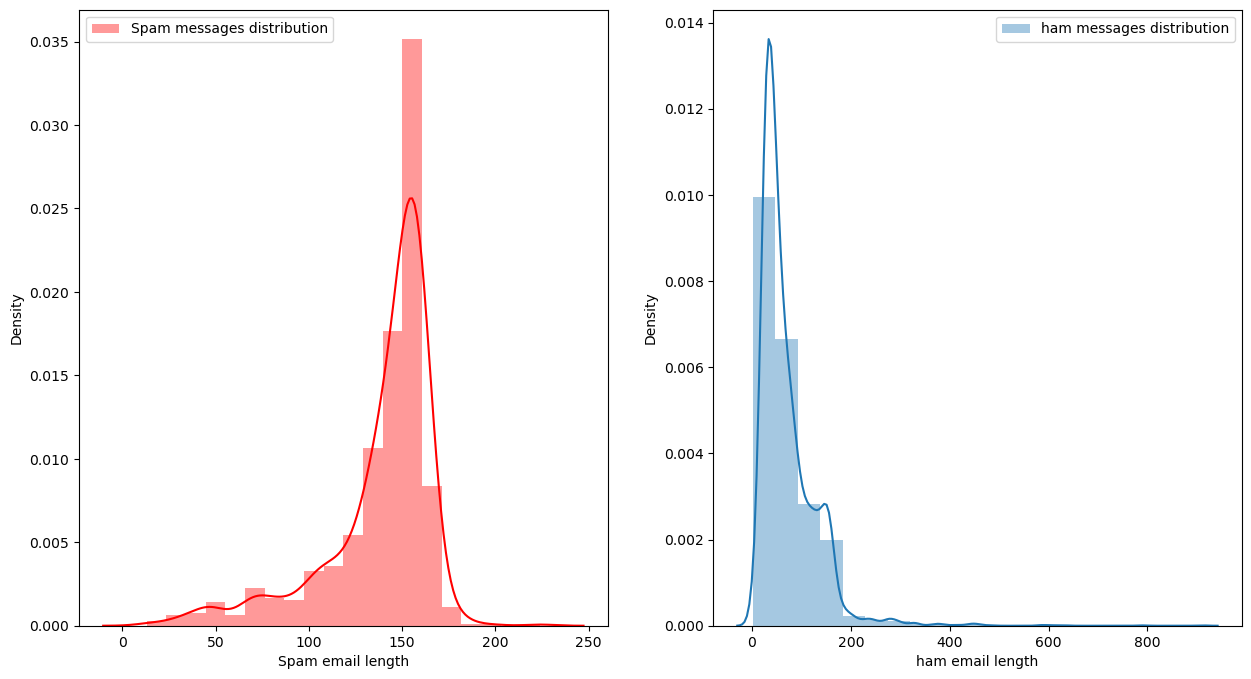

In [37]:
# Message distribution BEFORE cleaning
f, ax = plt. subplots(1,2, figsize= (15,8))
sns.distplot(df[df['label']==1]['length'], bins=20, ax=ax[0], label='Spam messages distribution',color='r')
ax[0].set_xlabel('Spam email length')
ax[0].legend()
sns.distplot(df[df['label']==0]['length'],bins=20, ax=ax[1], label='ham messages distribution')
ax[1].set_xlabel('ham email length')
ax[1].legend()
plt.show()

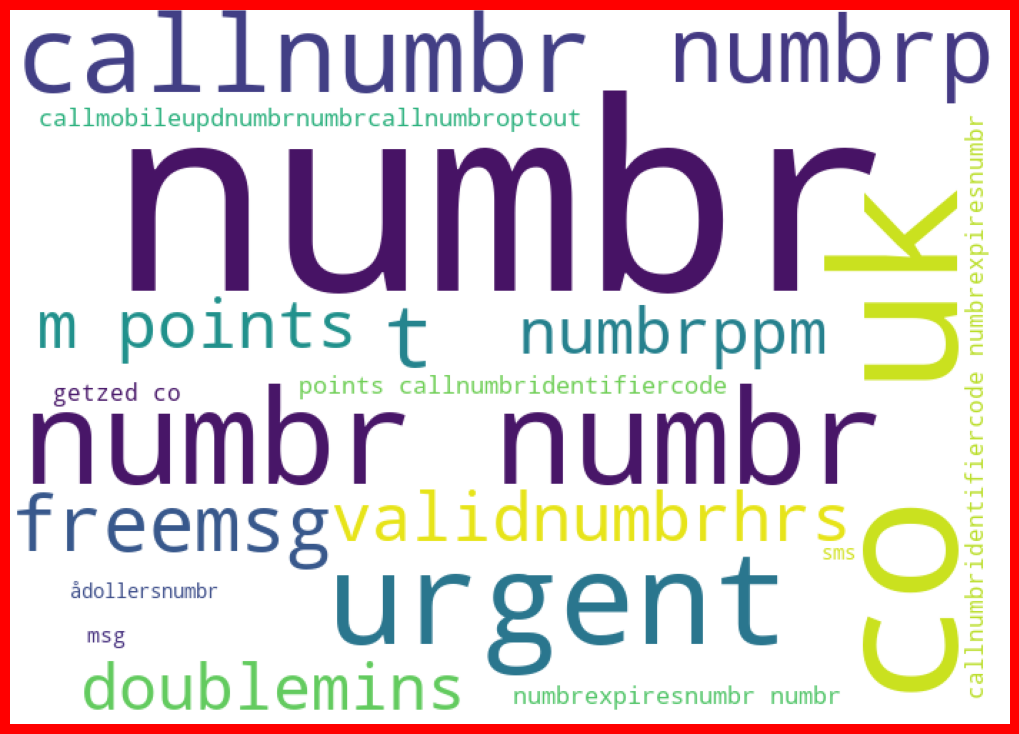

In [38]:
#Getting sense of word cloud in spam
from wordcloud import WordCloud
spams=df['message'][df['label']==1]
spam_cloud = WordCloud(width=700,height=500, background_color='white', max_words=20).generate(' '.join(spams))
plt.figure(figsize=(10,8), facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [40]:
#1. Convert text into vectors using TF-IDF
# 2. Instantiate MultinomiaLNB classifier
#3. Split feature and Label
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
tf_vec = TfidfVectorizer()
naive=MultinomialNB()
features=tf_vec.fit_transform(df['message'])
X = features
y = df['label']

In [42]:
# Train and predict
X_train,x_test, Y_train,y_test=train_test_split(X,y,random_state=42)
naive.fit(X_train,Y_train)
y_pred=naive.predict(x_test)
print('Final score = > ', accuracy_score(y_test,y_pred))

Final score = >  0.91816223977028


In [43]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1202
           1       1.00      0.40      0.57       191

    accuracy                           0.92      1393
   macro avg       0.96      0.70      0.76      1393
weighted avg       0.93      0.92      0.90      1393



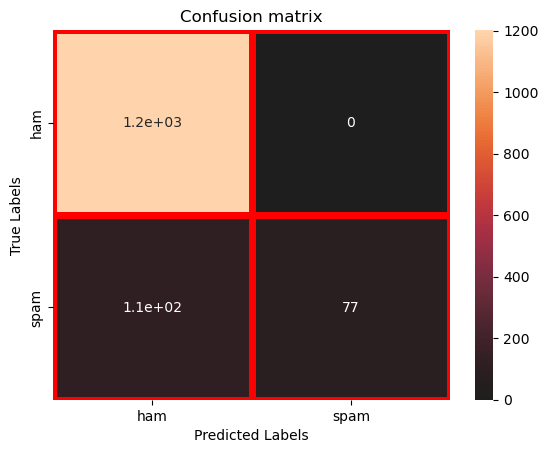

In [51]:
# plot confusion matrix heatmap
conf_mat = confusion_matrix(y_test,y_pred)
ax=plt.subplot()
sns.heatmap(conf_mat, annot=True, ax=ax, linewidths=5,linecolor='r',center=0)
ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')
ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels (['ham', 'spam'])
ax.yaxis.set_ticklabels(['ham', 'spam'])
plt.show()

In [52]:
conf_mat

array([[1202,    0],
       [ 114,   77]], dtype=int64)